# Net generation and investigation of 2d net-generated cluster 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import random
from math import ceil

## Grid generation with and without shell

In [93]:
def generate_filled_grid(n, fill_prob):
    nodes = []
    stack = [(int(n // 2), int(n // 2), int(n // 2))]

    while stack:
        new_stack = []

        for node in stack:
            if random() < fill_prob:
                nodes.append(node)

                if all([random() < fill_prob, 
                        node[0] + 1 < n, 
                        not (node[0] + 1, node[1], node[2]) in nodes]):
                    new_stack.append((node[0] + 1, node[1], node[2]))

                if all([random() < fill_prob, 
                        node[0] - 1 >= 0, 
                        not (node[0] - 1, node[1], node[2]) in nodes]):
                    new_stack.append((node[0] - 1, node[1], node[2]))

                if all([random() < fill_prob, 
                        node[1] + 1 < n, 
                        not (node[0], node[1] + 1, node[2]) in nodes]):
                    new_stack.append((node[0], node[1] + 1, node[2]))

                if all([random() < fill_prob, 
                        node[1] - 1 >= 0, 
                        not (node[0], node[1] - 1, node[2]) in nodes]):
                    new_stack.append((node[0], node[1] - 1, node[2]))

                if all([random() < fill_prob, 
                        node[2] + 1 < n, 
                        not (node[0], node[1], node[2] + 1) in nodes]):
                    new_stack.append((node[0], node[1], node[2] + 1))

                if all([random() < fill_prob, 
                        node[2] - 1 >= 0, 
                        not (node[0], node[1], node[2] - 1) in nodes]):
                    new_stack.append((node[0], node[1], node[2] - 1))

        stack[:] = new_stack

    grid = np.zeros((n, n, n))

    for node in nodes:
        grid[node[0], node[1], node[2]] = 1

    return grid

def generate_filled_grid_with_shell(n, node_prob, shell_prob):
    nodes = []
    shells = []

    n_with_shell = n * 3

    mid = ceil(n_with_shell / 2.) - 1
    mid -= 1 if n % 2 == 0 else 0

    stack = [(mid, mid, mid)]

    while stack:
        new_stack = []

        for node in stack:
            if random() < node_prob:
                nodes.append(node)

                if random() < shell_prob:
                    shells.append((node[0] + 1, node[1], node[2]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[0] + 3 < n_with_shell, 
                            not (node[0] + 3, node[1], node[2]) in nodes]):
                        shells.append((node[0] + 2, node[1], node[2]))
                        new_stack.append((node[0] + 3, node[1], node[2]))

                if random() < shell_prob:
                    shells.append((node[0] - 1, node[1], node[2]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[0] - 3 > 0, 
                            not (node[0] - 3, node[1], node[2]) in nodes]):
                        shells.append((node[0] - 2, node[1], node[2]))
                        new_stack.append((node[0] - 3, node[1], node[2]))


                if random() < shell_prob:
                    shells.append((node[0], node[1] + 1, node[2]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[1] + 3 < n_with_shell, 
                            not (node[0], node[1] + 3, node[2]) in nodes]):
                        shells.append((node[0], node[1] + 2, node[2]))
                        new_stack.append((node[0], node[1] + 3, node[2]))

                if random() < shell_prob:
                    shells.append((node[0], node[1] - 1, node[2]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[1] - 3 > 0, 
                            not (node[0], node[1] - 3, node[2]) in nodes]):
                        shells.append((node[0], node[1] - 2, node[2]))
                        new_stack.append((node[0], node[1] - 3, node[2]))


                if random() < shell_prob:
                    shells.append((node[0], node[1], node[2] + 1))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[2] + 3 < n_with_shell, 
                            not (node[0], node[1], node[2] + 3) in nodes]):
                        shells.append((node[0], node[1], node[2] + 2))
                        new_stack.append((node[0], node[1], node[2] + 3))

                if random() < shell_prob:
                    shells.append((node[0], node[1], node[2] - 1))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[2] - 3 > 0, 
                            not (node[0], node[1], node[2] - 3) in nodes]):
                        shells.append((node[0], node[1], node[2] - 2))
                        new_stack.append((node[0], node[1], node[2] - 3))

        stack[:] = new_stack

    grid = np.zeros((n_with_shell, n_with_shell, n_with_shell))

    for node in nodes:
        grid[node[0], node[1], node[2]] = 1

    for shell in shells:
        grid[shell[0], shell[1], shell[2]] = 0.5
        
    return grid

In [107]:
def display_grid(markers, figure, vmin=None, vmax=None):
    res_voxel = np.full(markers.shape, False)

    n = markers.shape[0]

    for i in range(n):
        for j in range(n):
            for k in range(n):
                res_voxel[i, j, k] = markers[k, n - j - 1, i] != 0

    if 1 in markers:
        facecolors = np.empty(res_voxel.shape, dtype=object)
        facecolors[res_voxel] = '#555555FF'

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.voxels(res_voxel, facecolors=facecolors) 

        plt.show()
    else:
        print("No clusters found")

In [103]:
def split_voxels(n, grid):
    res_nodes = np.full((n * 3, n * 3, n * 3), False)
    res_shells = np.full((n * 3, n * 3, n * 3), False)

    size_with_shells = n * 3
    nodes_index_range = range(1, size_with_shells, 3)
    

    for i in nodes_index_range:
        for j in nodes_index_range:
            for k in nodes_index_range:
                if grid[i, j, k] == 1:
                    res_nodes[i, j, k] = True
                    res_shells[i - 1, j, k] = grid[i - 1, j, k] == 0.5
                    res_shells[i + 1, j, k] = grid[i + 1, j, k] == 0.5
                    res_shells[i, j - 1, k] = grid[i, j - 1, k] == 0.5
                    res_shells[i, j + 1, k] = grid[i, j + 1, k] == 0.5
                    res_shells[i, j, k - 1] = grid[i, j, k - 1] == 0.5
                    res_shells[i, j, k + 1] = grid[i, j, k + 1] == 0.5

    return res_nodes, res_shells
    
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

def get_indices_for_faces(res_voxel):
    x, y, z = np.indices(np.array(res_voxel.shape) + 1).astype(float) 
    x[2::6, :, :] -= 1.0
    x[3::6, :, :] += 1.5
    x[4::6, :, :] += 0.5
    x[5::6, :, :] += 0.5
    x[6::6, :, :] -= 0.5
    
    y[:, 2::6, :] -= 1.0
    y[:, 3::6, :] += 1.5
    y[:, 4::6, :] += 0.5
    y[:, 5::6, :] += 0.5
    y[:, 6::6, :] -= 0.5

    z[:, :, 2::6] -= 1.0
    z[:, :, 3::6] += 1.5
    z[:, :, 4::6] += 0.5
    z[:, :, 5::6] += 0.5
    z[:, :, 6::6] -= 0.5
    return x, y, z

In [104]:
def display_grid_with_shells(raw_arr, figure, vmin=None, vmax=None):
    arr = np.zeros(raw_arr.shape)

    n = int(raw_arr.shape[0] / 3)

    for i in range(n * 3):
        for j in range(n * 3):
            for k in range(n * 3):
                arr[i, j, k] = raw_arr[k, n * 3 - j - 1, i]

    node_voxels, shell_voxels = split_voxels(n, arr)

    res_voxel = node_voxels | shell_voxels

    facecolors = np.empty(res_voxel.shape, dtype=object)
    edgecolors = np.empty(res_voxel.shape, dtype=object)

    facecolors[shell_voxels] = '#cccccc48'
    facecolors[node_voxels] = '#000000'

    res_voxel_e = explode(res_voxel)
    facecolors_e = explode(facecolors)
    x, y, z = get_indices_for_faces(res_voxel_e)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.invert_zaxis()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.voxels(x,y,z,res_voxel_e, facecolors=facecolors_e) 

    plt.show()

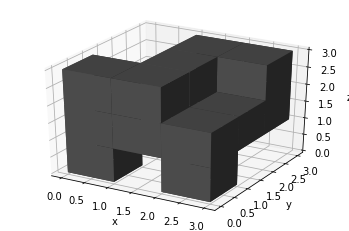

In [117]:
grid = generate_filled_grid(3, 0.7)
display_grid(grid, "lol")

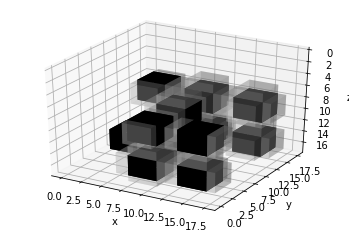

In [121]:
filled_grid_with_shell = generate_filled_grid_with_shell(n=3, node_prob=0.6, shell_prob=0.6)
display_grid_with_shells(filled_grid_with_shell, "with_shell")